# Instructions for users

### The zip file must have a single folder data which should have folders. Each folder represents a class name in the folders only images pertaining to that class must be contained


In [1]:
import zipfile

zip_file = "data.zip"
extract_to = ""

with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_to)


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, callbacks
from keras.api.preprocessing import image, image_dataset_from_directory


2024-08-09 21:18:25.378603: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 21:18:25.438857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 21:18:25.438887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 21:18:25.467471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 21:18:25.486465: I tensorflow/core/platform/cpu_feature_gua

In [5]:
data_dir = "data"
batch_size = 1
img_height = 120
img_width = 120

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


AUTOTUNE = tf.data.experimental.AUTOTUNE

class_names = train_ds.class_names
print(f"class_names = {class_names}")

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
class_names = ['cat', 'dog']


In [4]:
tf.random.set_seed(123)
model = models.Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=[img_height, img_width, 3]),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.35),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.35),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.35),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.35),
        layers.Dense(64, activation="relu"),

        layers.Dense(num_classes),
    ]
)

lr = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

early_stopping = callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True,
)


/home/arnav-fedora/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping],
)


Epoch 1/20


I0000 00:00:1721553130.400433  231555 service.cc:145] XLA service 0x7f8344004100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721553130.400468  231555 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-07-21 14:42:10.437272: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-21 14:42:10.626209: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


   64/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.4742 - loss: 0.7002      

I0000 00:00:1721553134.208695  231555 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.5539 - loss: 0.6731 - val_accuracy: 0.7542 - val_loss: 0.5045
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.7599 - loss: 0.4998 - val_accuracy: 0.8144 - val_loss: 0.4218
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8077 - loss: 0.4346 - val_accuracy: 0.8272 - val_loss: 0.3956
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 114s 6ms/step - accuracy: 0.8296 - loss: 0.3848 - val_accuracy: 0.7898 - val_loss: 0.4257
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.8523 - loss: 0.3373 - val_accuracy: 0.8046 - val_loss: 0.4330
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.8777 - loss: 0.2906 - val_accuracy: 0.8388 - val_loss: 0.3809
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9035 - loss: 0.2478 - val_accuracy: 0.8296 - val_loss: 0.3978
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.9200 - 

In [7]:
model.save("model_0.keras")


In [3]:
model = tf.keras.models.load_model("model_0.keras")


2024-08-09 21:18:37.696167: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-09 21:18:37.858703: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-09 21:18:37.862642: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
val_loss, val_acc = model.evaluate(val_ds, verbose=2)
train_loss, train_acc = model.evaluate(train_ds, verbose=2)
print(f"Validation accuracy: {val_acc}")
print(f"Validation accuracy: {train_acc}")


I0000 00:00:1723218537.884184  136636 service.cc:145] XLA service 0x7f85f0007a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723218537.884217  136636 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-08-09 21:18:57.897460: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-09 21:18:57.951662: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1723218538.499051  136636 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5000/5000 - 5s - 1ms/step - accuracy: 0.8388 - loss: 0.3809
20000/20000 - 21s - 1ms/step - accuracy: 0.9175 - loss: 0.2210
Validation accuracy: 0.8388000130653381
Validation accuracy: 0.9175000190734863


In [8]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence.".format(
            class_names[tf.argmax(score)], 100 * tf.reduce_max(score)
        )
    )


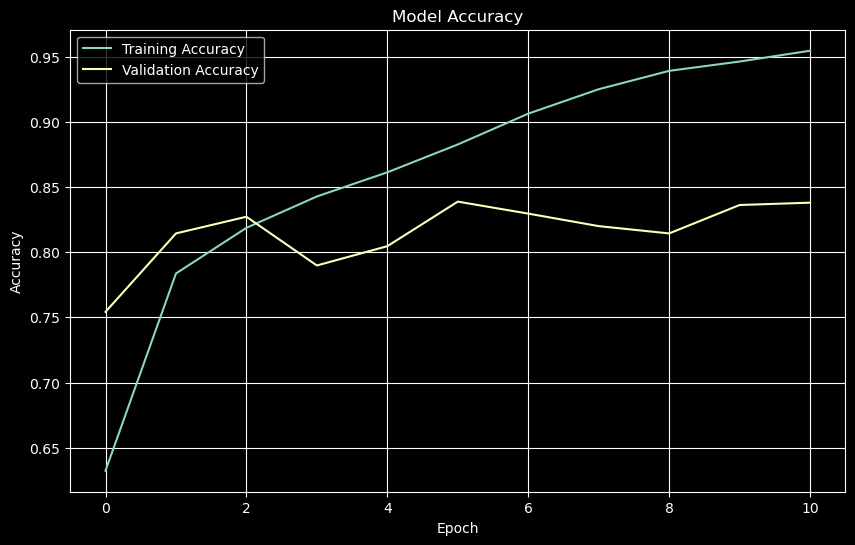

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
predict_image("data/cat/cat.1.jpg")
predict_image("data/dog/dog.1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
This image most likely belongs to cat with a 97.86 percent confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image most likely belongs to dog with a 97.84 percent confidence.
